# **Email classification**

The objective of this model is to increase the performance of the automated email classification and sorting process that support this project. In order to improve the current model our proposed model should have greater or equivalent F1-score and a better classification rate.

I taken this dataset from kaggle , 
dataset_link = "https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emails.csv")
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

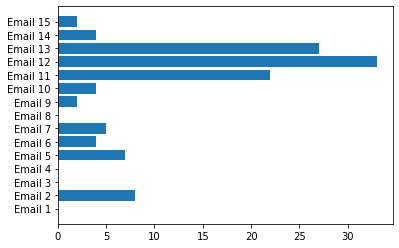

In [ ]:
fig,ax = plt.subplots() # create a oiterframe for graph
_x = df['Email No.'].head(15) # set value of x is email no column
_y = df['the'].head(15) # set y value is 'the' column in dataframe
ax.barh(_x,_y); # plot bar graph

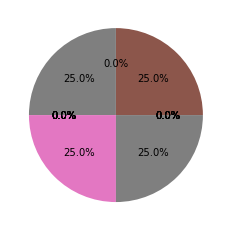

In [ ]:
fig,ax = plt.subplots()
c = df['Prediction'].head(20)
ax.pie(c,autopct = '%1.1f%%'); #plot pie graph

In [ ]:
def convt_string_to_number(email): # define a fuction to convert string to numbers
  new = email.replace('Email',' ') # replace function is used to replace the email with nothing
  return int(new) # return integer

df['Email No.'] = df['Email No.'].apply(convt_string_to_number) #update df[email No.] columns

In [ ]:
df.dtypes

Email No.     int64
the           int64
to            int64
ect           int64
and           int64
              ...  
military      int64
allowing      int64
ff            int64
dry           int64
Prediction    int64
Length: 3002, dtype: object

In [ ]:
# declare X and y

X = df.drop("Prediction",axis = 'columns')
y = df['Prediction']

X.head(5)


,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=252)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3620, 3001), (3620,), (1552, 3001), (1552,))

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [ ]:
model_1 = DecisionTreeClassifier()
model_1.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.9658505154639175

In [ ]:
model_1.score(X_test,y_test)

0.9246134020618557

In [ ]:
model_2.score(X_test,y_test)

0.967139175257732

Random forest is giving best score , so use this model for later use

In [ ]:
y_pred1 = model.predict(X_test) # predict is used to find predict of X_test value

In [ ]:
y_pred2 = model_1.predict(X_test)

In [ ]:
y_pred3 = model_2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [ ]:
confusion_matrix(y_test,y_pred3) #confusion matrix is used to find true positive ,false positive,true negative and false negative

array([[1071,   24],
       [  27,  430]])

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1095
           1       0.95      0.94      0.94       457

    accuracy                           0.97      1552
   macro avg       0.96      0.96      0.96      1552
weighted avg       0.97      0.97      0.97      1552



This model is 0.96 precent accuracy,have precison 0 is 0.97 and for 1 is 0.98